# Challenge Set 2
Topic:        Pandas (movie data)  
Date:         07/16/2016  
Name:         Marc Gameroff  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.data import DataReader
from dateutil.parser import parse

In [376]:
# Read in data, parse dates
df = pd.read_csv('2013_movies.csv', converters={'ReleaseDate': parse})

In [377]:
# Check column types
df.dtypes

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate           datetime64[ns]
dtype: object

In [520]:
# Glance at the data 
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14


## Challenge 1
#### Plot domestic total gross over time.

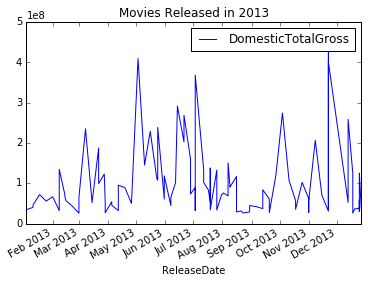

In [315]:
df.plot(kind='line', x='ReleaseDate', y='DomesticTotalGross', ylim=[0,500000000],
        title="Movies Released in 2013")

## Challenge 2
#### Plot runtime vs. domestic total gross.

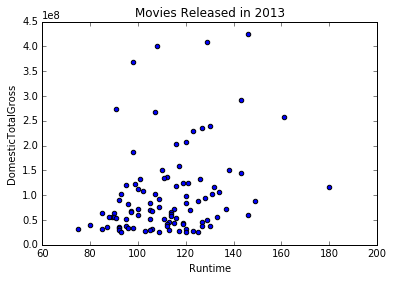

In [307]:
df.plot(kind='scatter', x='Runtime', y='DomesticTotalGross', title="Movies Released in 2013")

## Challenge 3
#### Find the average runtime and domestic total gross at each level of Rating.

In [474]:
by_rating = df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()
by_rating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4
#### Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


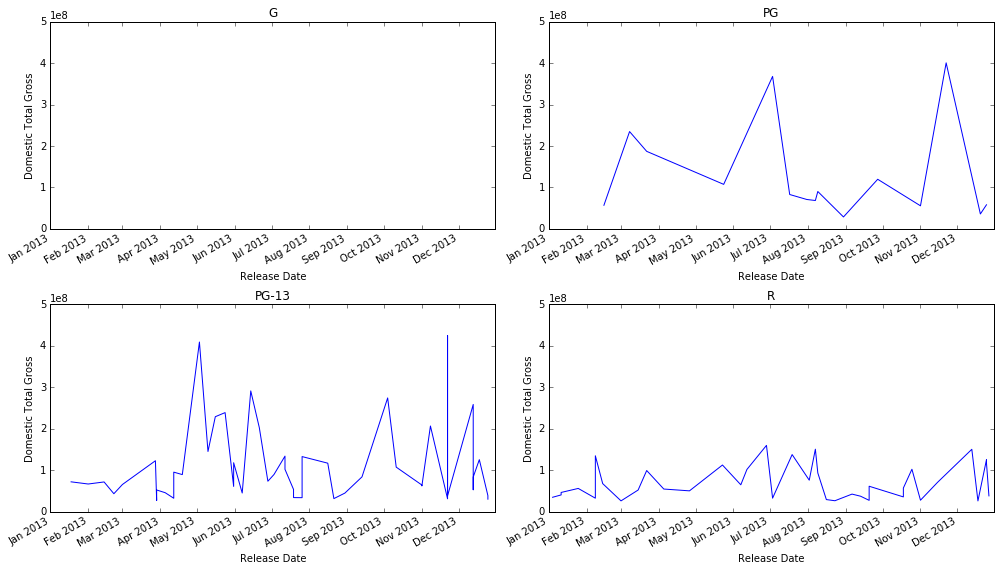

In [517]:
from datetime import datetime

ratings = ['G','PG','PG-13','R']

grouped = df.groupby('Rating')

x, y = grouped.ReleaseDate, grouped.DomesticTotalGross

# 'date' created during an attempt to draw a dot on the first subplot ('G')
# at point (date, 2.684928e+08). Don't know how to get it to recognize the
# x-value I want the dot at.
date=np.datetime64('2013-06-21').astype(datetime)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 8)
# Suppress main title because can't get it not to obscure subplot titles
# fig.suptitle('Domestic Total Gross of Movies Released in 2013, by Rating', size=20)
plt.subplots_adjust(top=100)
for (i, j), ax in zip(grouped, axs.flat):
    ax.set_ylim(0,500000000)
    j.plot(x='ReleaseDate', y='DomesticTotalGross',  ax=ax, sharex=False,
           sharey=False, legend=False, title = i)  
    if i == ratings[0]:
        # wanted to draw the single dot here
        pass
    # Reminder to self:    
    # xlim/ylim have to be set AFTER the last plot(), otherwise pandas
    # will automatically reset the limits to match the contents
    # see: http://tinyurl.com/h8lnw77
    ax.set_xlabel('Release Date')
    ax.set_ylabel('Domestic Total Gross')
    ax.set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-12-31')) 
fig.tight_layout()


## Challenge 5
#### What director in your dataset has the highest gross per movie?

In [557]:
df['DomesticTotalGross'].groupby(df['Director']).mean().sort_values(ascending=False).head()

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64

Answer: Francis Lawrence had the highest gross per movie released in 2013.

## Challenge 6
#### Graph of the mean domestic total gross by month

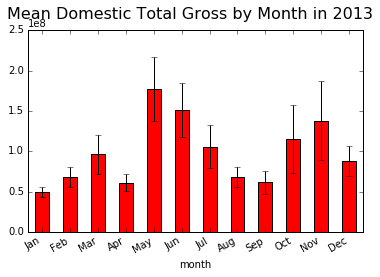

In [709]:
df['date'] = pd.to_datetime(df['ReleaseDate'])
df['year'], df['month'] = df['Date'].dt.year, df['date'].dt.month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nums = range(1, 13)

month_names = zip(nums,months)
monthlies = df['DomesticTotalGross'].groupby(df['month'])
means = monthlies.mean()
month_counts = monthlies.count()
stddevs = monthlies.std()
sems = stddevs/np.sqrt(month_counts)

fig, ax = plt.subplots()
my_bars = means.plot.bar(yerr=sems, ax=ax, color='red')
ax.set_xticklabels(months)
ax.set_ylim(0,250000000)
fig.autofmt_xdate()
fig.suptitle('Mean Domestic Total Gross by Month in 2013', size=16)

